# Chronical Kidney Disease

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import skew

In [261]:
df = pd.read_csv('chronic_kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [262]:
df.shape

(400, 25)

In [263]:
print(len(df.columns))

25


In [264]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [265]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,46,3,3,3,3,3,3,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,106,131,251,261,364,317,323,339,250


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      400 non-null    object
 1   blood_pressure           400 non-null    object
 2   specific_gravity         400 non-null    object
 3   albumin                  400 non-null    object
 4   sugar                    400 non-null    object
 5   red_blood_cells          400 non-null    object
 6   pus_cell                 400 non-null    object
 7   pus_cell_clumps          400 non-null    object
 8   bacteria                 400 non-null    object
 9   blood_glucose_random     400 non-null    object
 10  blood_urea               400 non-null    object
 11  serum_creatinine         400 non-null    object
 12  sodium                   400 non-null    object
 13  potassium                400 non-null    object
 14  haemoglobin              400 non-null    o

In [267]:
df = df.replace('?', np.nan)

In [268]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [269]:
label_encoder = preprocessing.LabelEncoder()
df["class"]= label_encoder.fit_transform(df["class"])
df["class"].unique()

array([0, 1])

In [270]:
for i in df:
    print(f'{i}  missing values == {df[i].isna().sum()}')

age  missing values == 9
blood_pressure  missing values == 12
specific_gravity  missing values == 47
albumin  missing values == 46
sugar  missing values == 49
red_blood_cells  missing values == 152
pus_cell  missing values == 65
pus_cell_clumps  missing values == 4
bacteria  missing values == 4
blood_glucose_random  missing values == 44
blood_urea  missing values == 19
serum_creatinine  missing values == 17
sodium  missing values == 87
potassium  missing values == 88
haemoglobin  missing values == 52
packed_cell_volume  missing values == 71
white_blood_cell_count  missing values == 106
red_blood_cell_count  missing values == 131
hypertension  missing values == 2
diabetes_mellitus  missing values == 2
coronary_artery_disease  missing values == 2
appetite  missing values == 1
peda_edema  missing values == 1
anemia  missing values == 1
class  missing values == 0


In [271]:
for i in df[['age','blood_pressure','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']]:
    df[i]=df[i].astype('float64')

In [272]:
for i in df[['age','blood_pressure','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']]:
    df[i] = df[i].fillna(df[i].mean())

In [273]:
for i in df[['specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','anemia']]:
    df[i] = df[i].fillna(df[i].mode()[0])

In [274]:
for i in df[['specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','anemia']]:
    df[i]= label_encoder.fit_transform(df[i])

In [275]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


In [276]:
num = df.select_dtypes(include=['float64'])
obj = df.select_dtypes(include=['int32'])

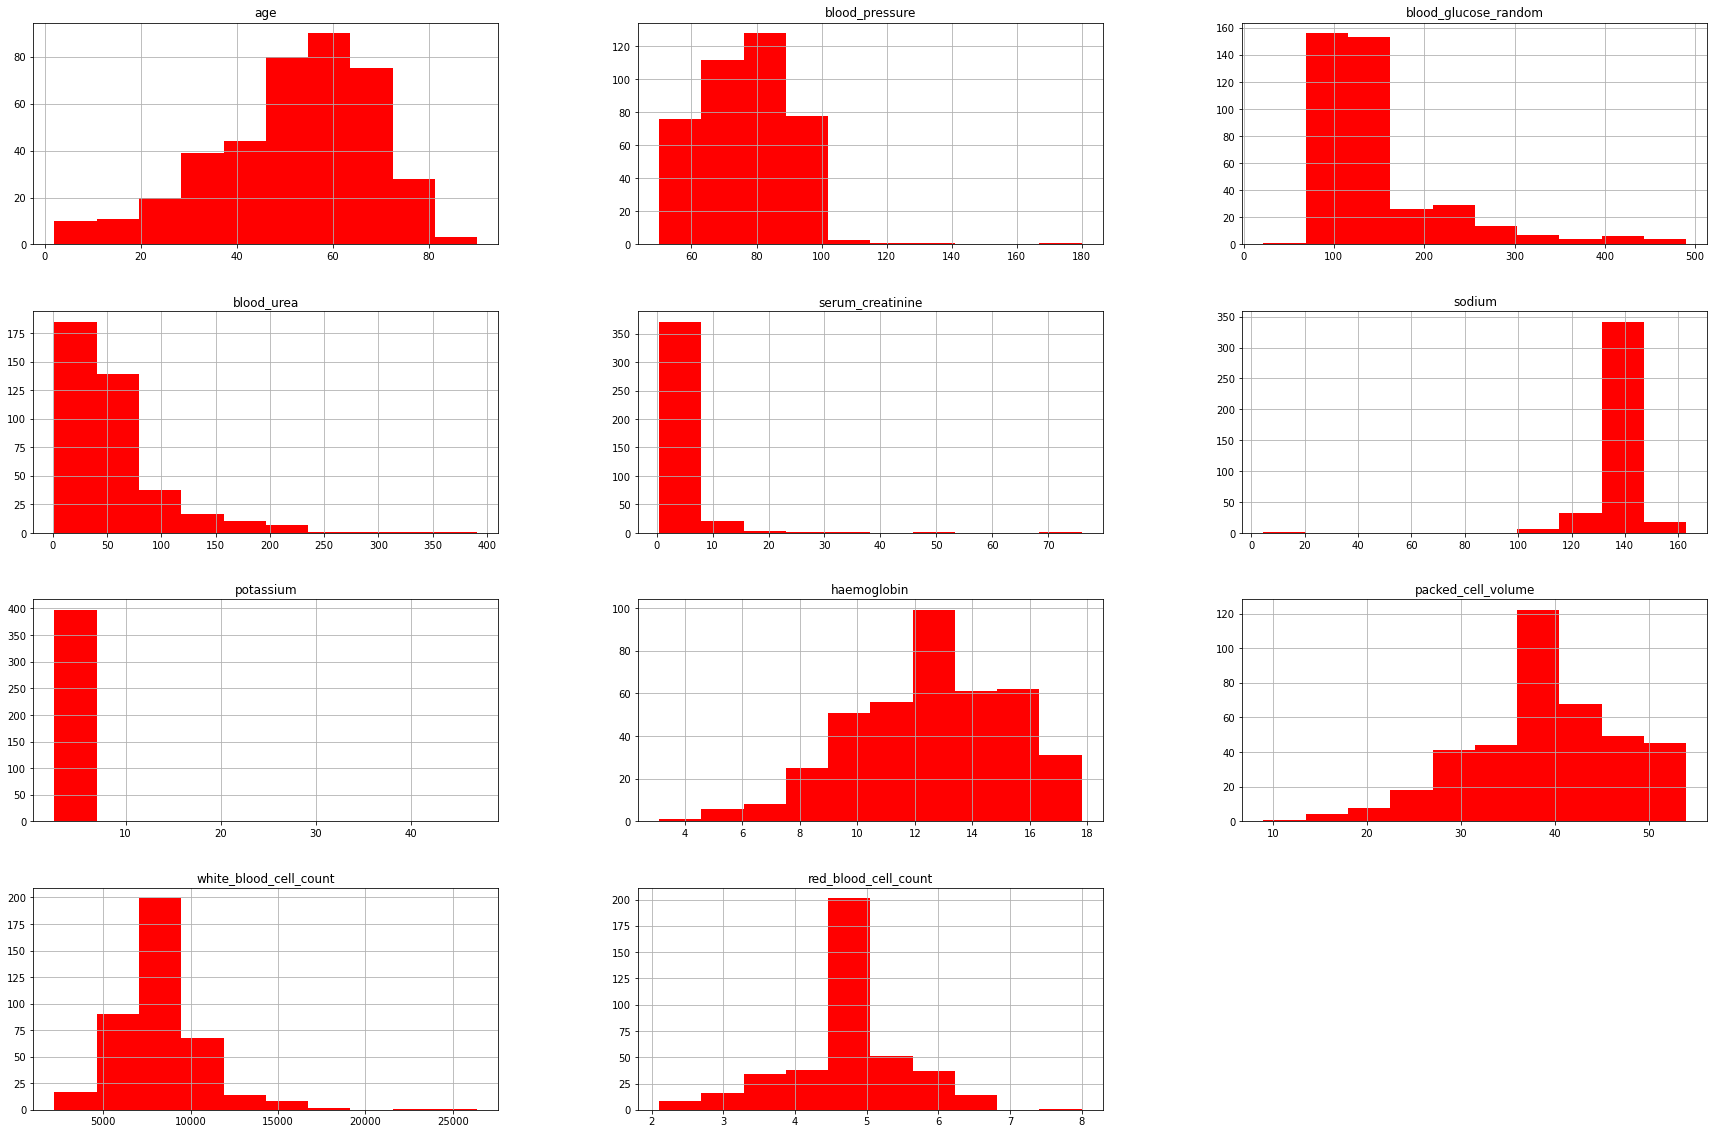

In [277]:
num.hist(figsize=(30,20),color='red')
plt.show()

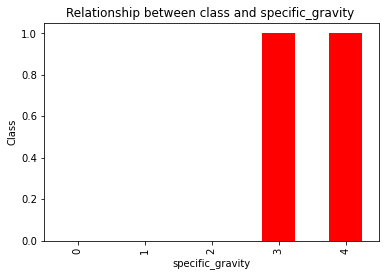

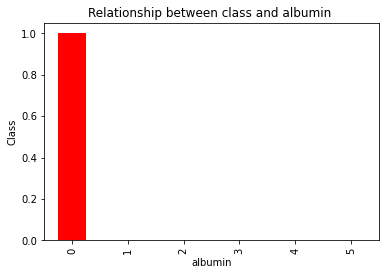

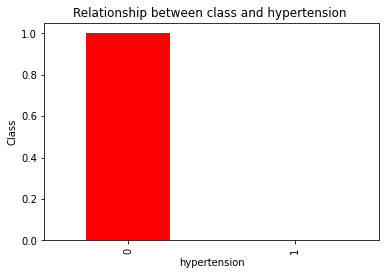

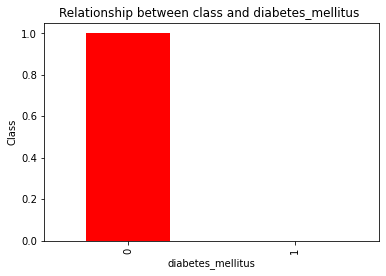

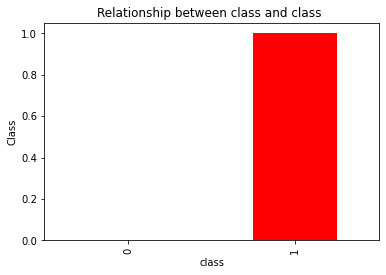

In [278]:
for i in obj:
    if df.groupby(i)['class'].median().sum() !=0:
        df.groupby(i)['class'].median().plot.bar(color="red")
        plt.xlabel(i)
        plt.ylabel('Class')
        plt.title(f"Relationship between class and {i} ")
        plt.show()

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rouka\anaconda3\lib\si

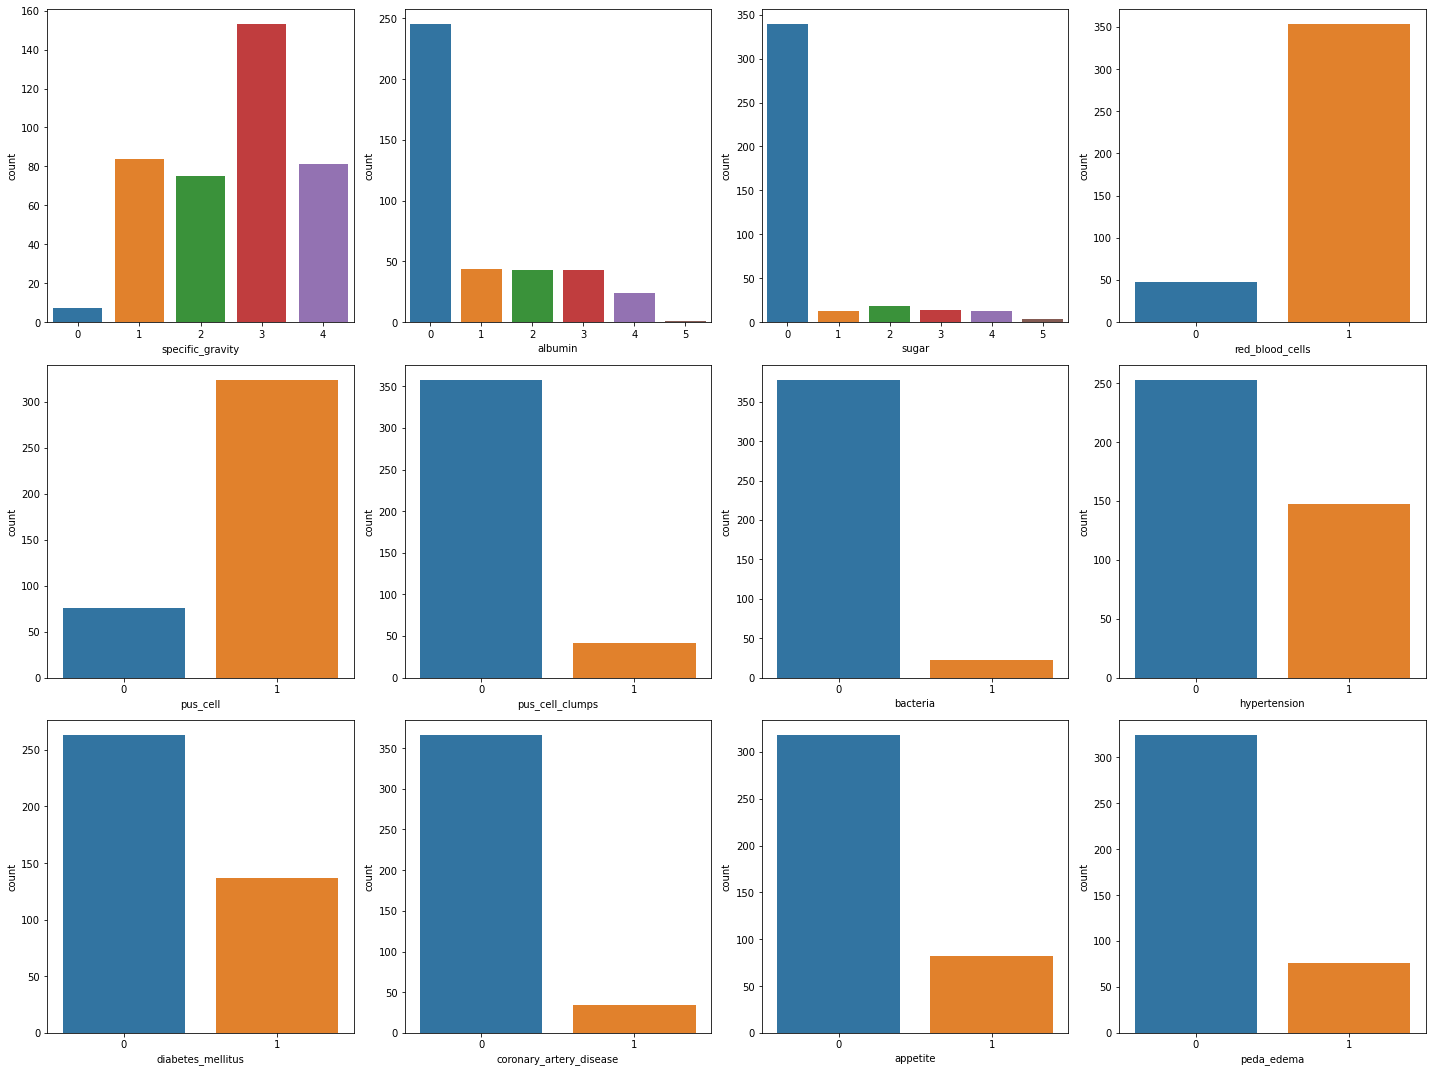

In [279]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in obj:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'tab10')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<AxesSubplot:>

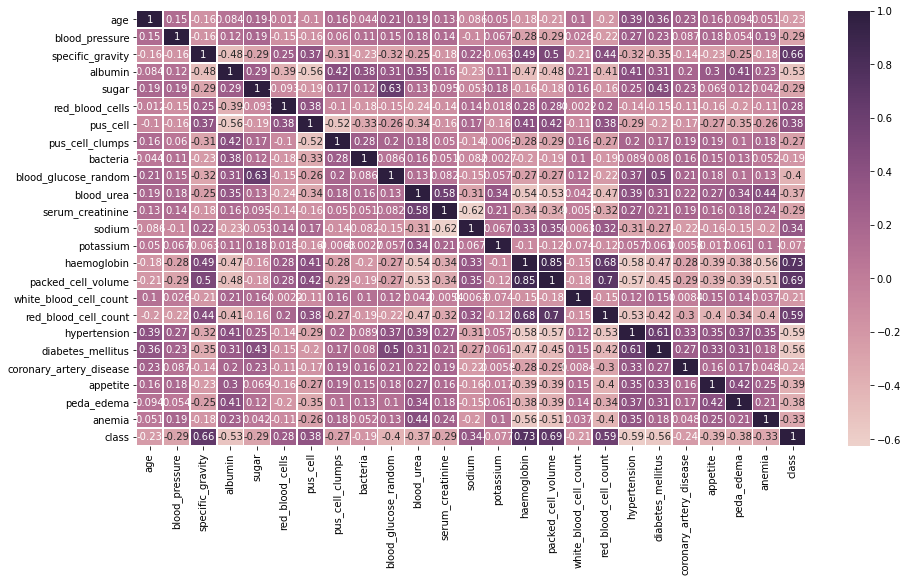

In [280]:
fig, ax = plt.subplots(figsize=(15,8))        
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))

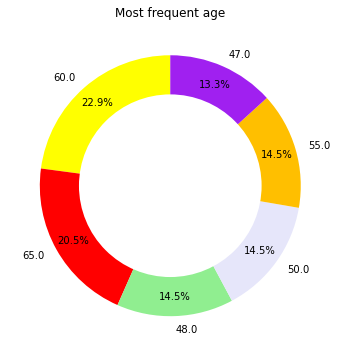

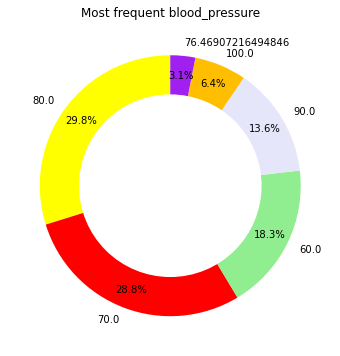

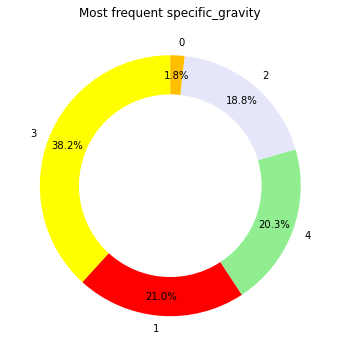

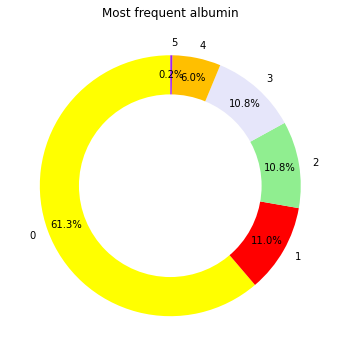

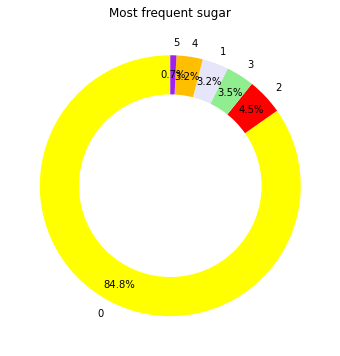

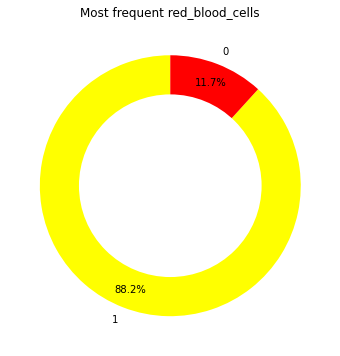

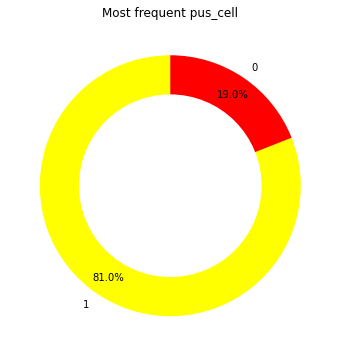

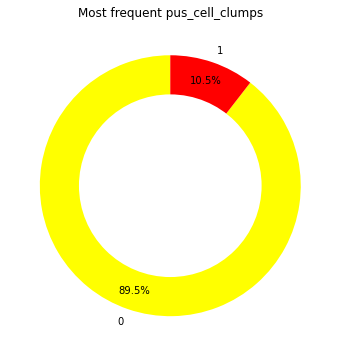

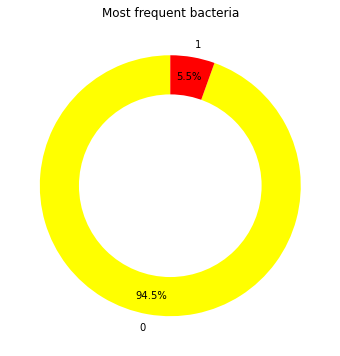

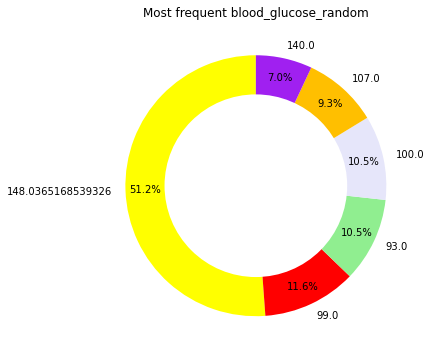

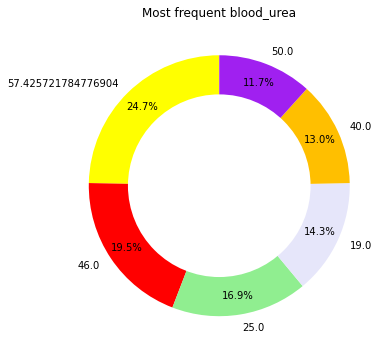

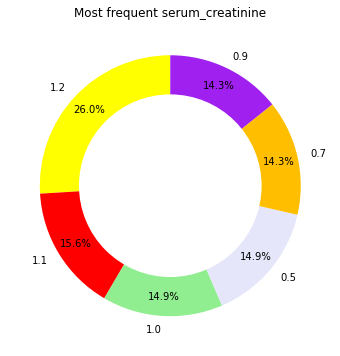

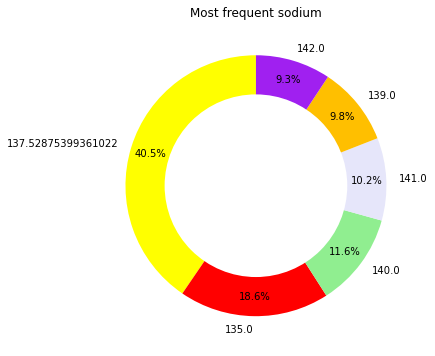

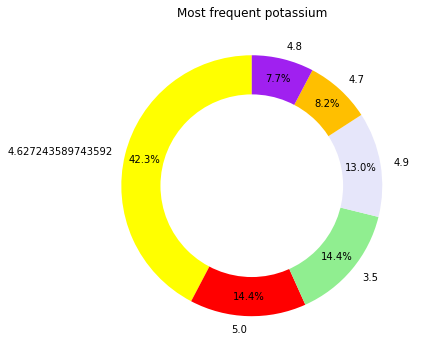

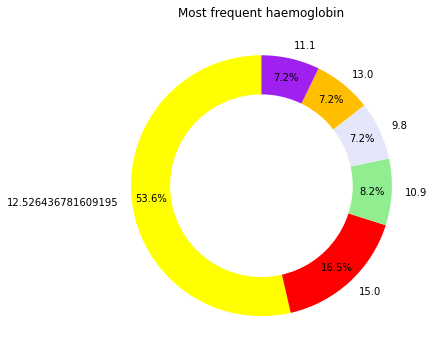

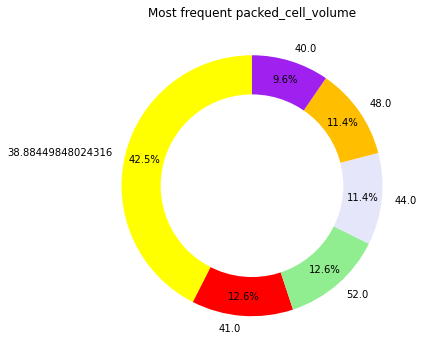

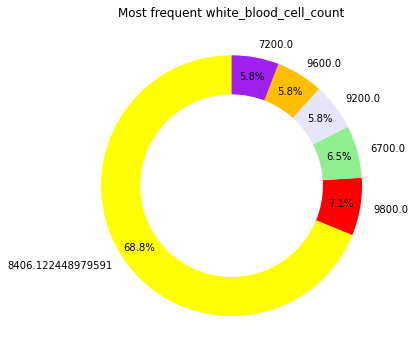

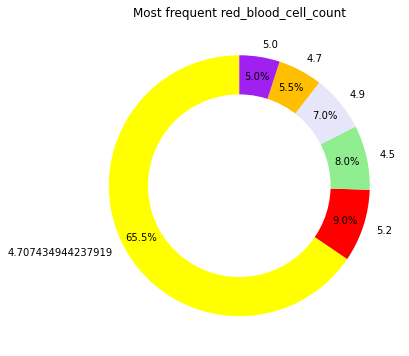

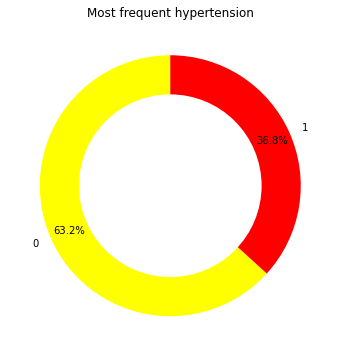

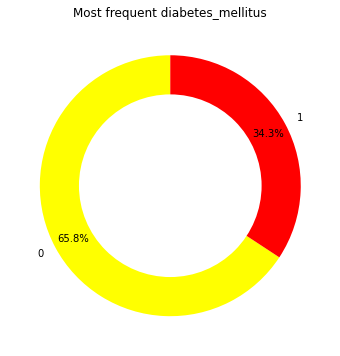

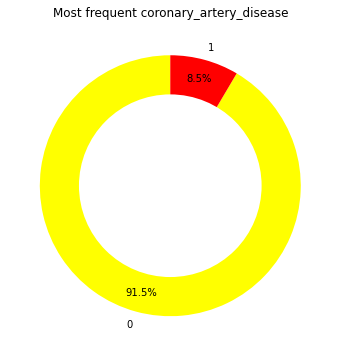

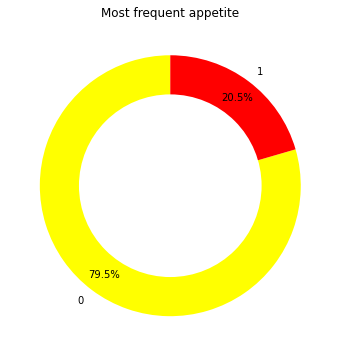

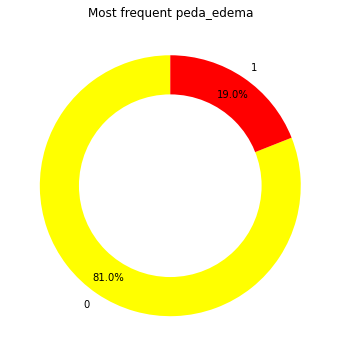

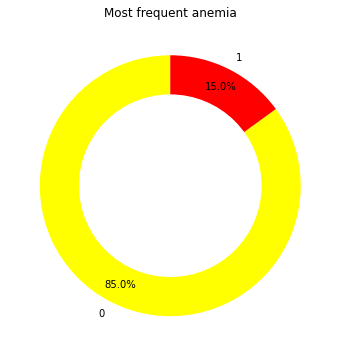

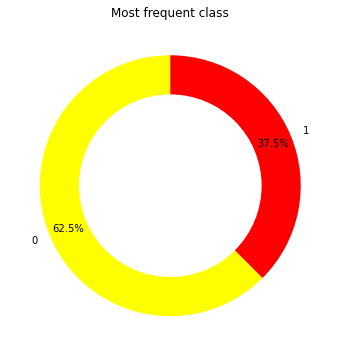

In [281]:
colors = ['#FFFF00','#FF0000','#90EE90','#E6E6FA','#FFBF00','#A020F0']

for i in df:
    ages = df[i].value_counts().index
    values = df[i].value_counts().values
    plt.pie(values[:6],labels=ages[:6],colors = colors,autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.set_size_inches(8,6)
    plt.title(f"Most frequent {i}")
    plt.show()

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

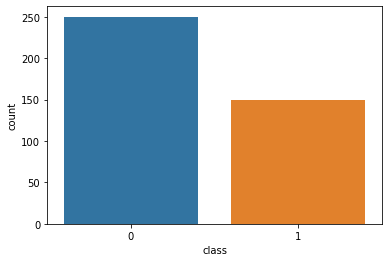

In [254]:
sns.countplot(df['class'])

 skewness of blood_pressure = 1.6237575531596693


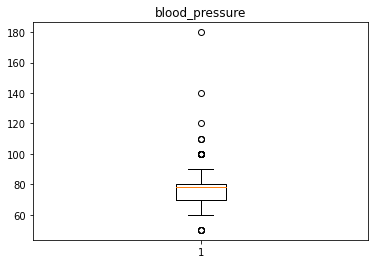

 skewness of blood_glucose_random = 2.1224240857825074


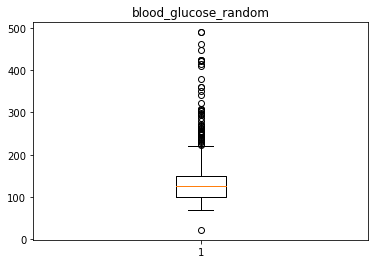

 skewness of blood_urea = 2.6886231806774763


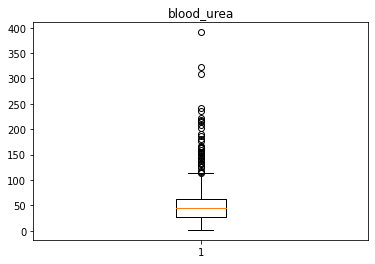

 skewness of serum_creatinine = 7.6443004785698125


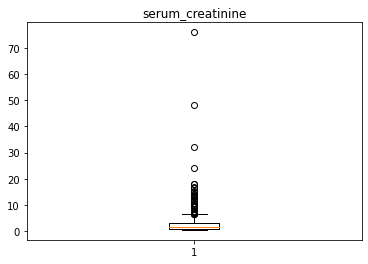

 skewness of sodium = -7.87143374665551


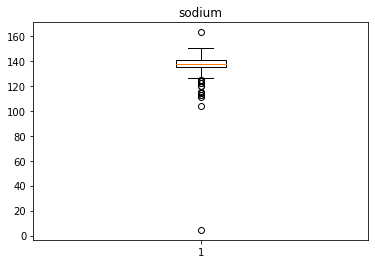

 skewness of potassium = 13.051976739270389


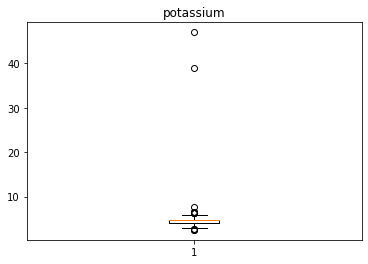

 skewness of haemoglobin = -0.3577088170020545


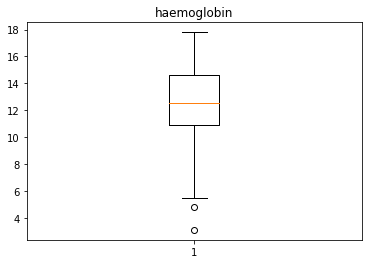

 skewness of packed_cell_volume = -0.4760065384416023


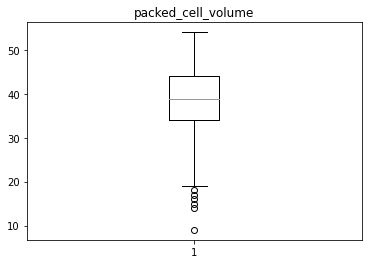

 skewness of white_blood_cell_count = 1.8817962372378698


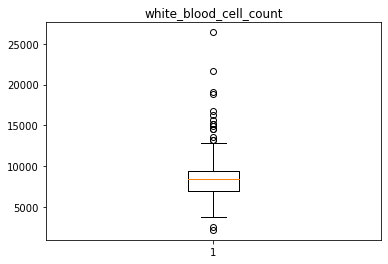

 skewness of red_blood_cell_count = -0.22230719010677968


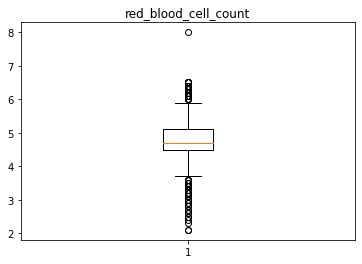

In [255]:
for i in num.drop('age', axis=1):
    print(f' skewness of {i} = {skew(df[i])}')
    plt.boxplot(df[i])
    plt.title(i)
    skew(df[i])
    plt.show()